In [1]:
import pandas as pd
from IPython.core.display import display
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
DATA_FOLDER_PATH = "/Users/ritumutaka/J/Categorical_Feature_Encoding_Challenge_II/datas/cat-in-the-dat-ii"
RANDOM_STATE = 2020

train = pd.read_csv(DATA_FOLDER_PATH + "/train.csv", index_col=0).sort_index(inplace=False)
test = pd.read_csv(DATA_FOLDER_PATH + "/train.csv", index_col=0).sort_index(inplace=False)
sample_submission = pd.read_csv(DATA_FOLDER_PATH + "/sample_submission.csv", index_col=0)


In [2]:
df_for_view = train[['ord_%s' % i for i in range(6)]].describe(include='all')

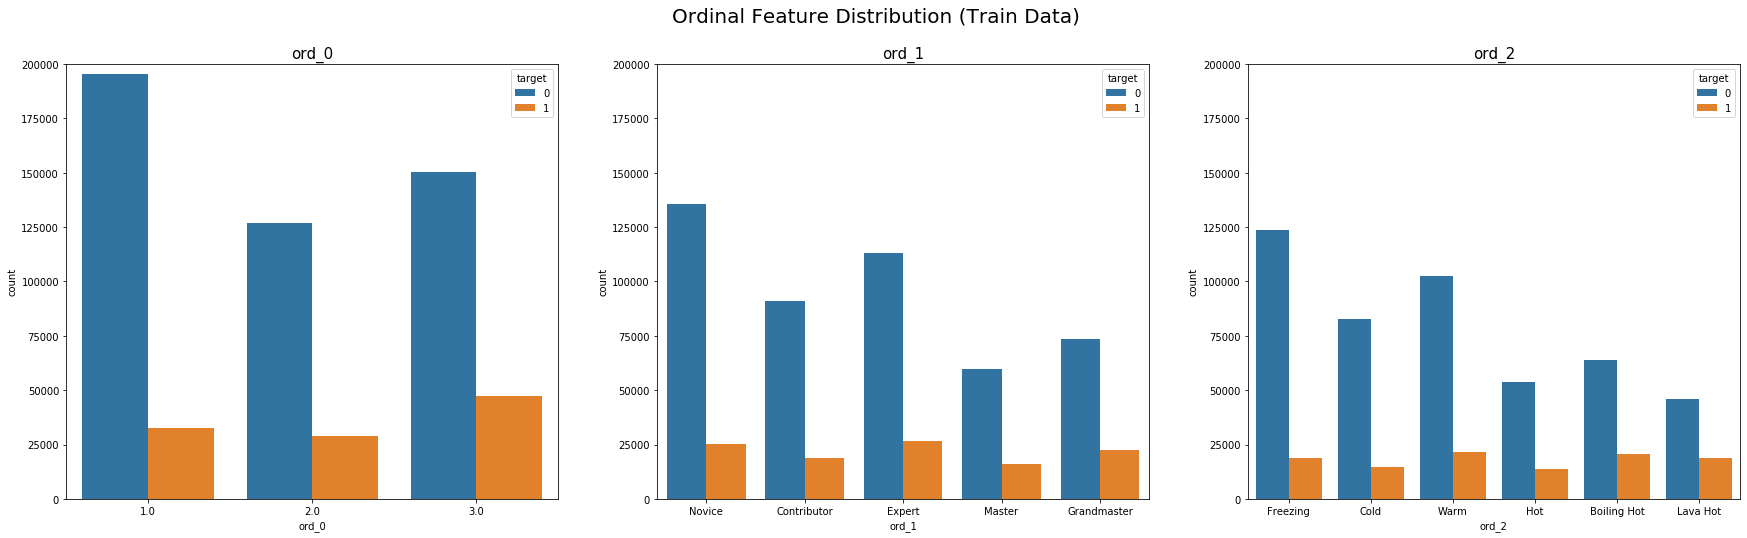

In [3]:
fig, ax = plt.subplots(1,3, figsize=(30, 8))

ord_orders = [
    [1.0, 2.0, 3.0],
    ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster'],
    ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot'],
]

for i in range(3):
    sns.countplot(f'ord_{i}', hue='target', data=train, ax=ax[i], order=ord_orders[i])
    ax[i].set_ylim([0, 200000])
    ax[i].set_title(f'ord_{i}', fontsize=15)
fig.suptitle("Ordinal Feature Distribution (Train Data)", fontsize=20)
plt.show()
    

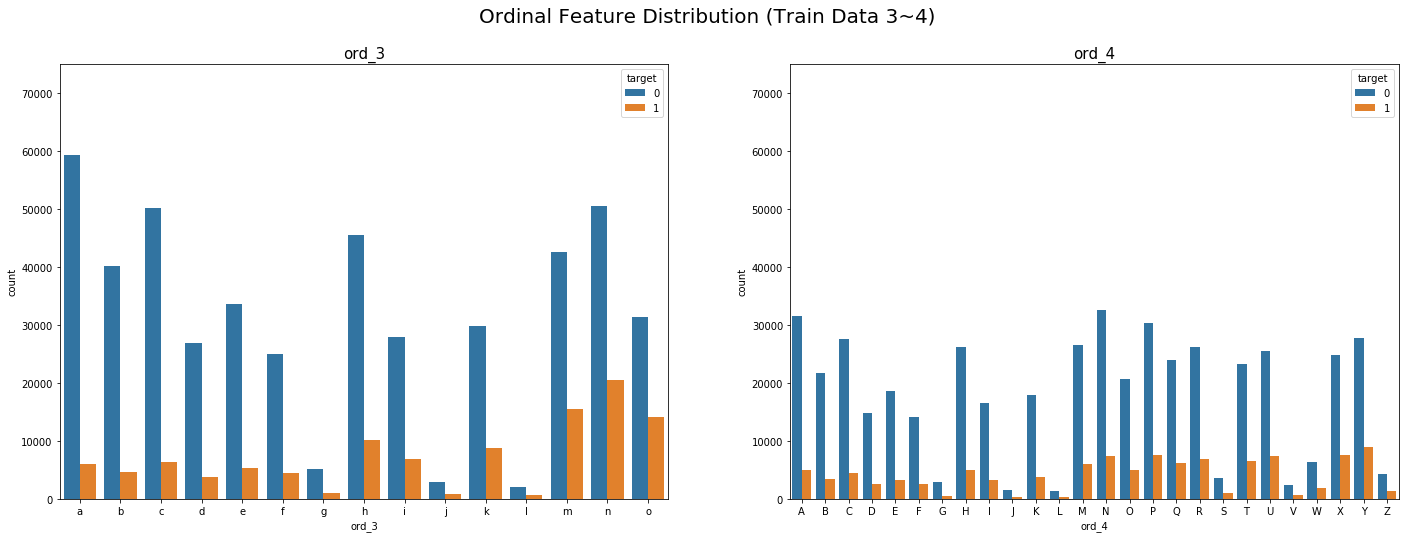

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(24, 8))

for i in range(3, 5):
    sns.countplot(f'ord_{i}', hue='target', data=train, ax=ax[i-3], 
                  order=sorted(train[f'ord_{i}'].dropna().unique()))
    ax[i-3].set_ylim([0, 75000])
    ax[i-3].set_title(f'ord_{i}', fontsize=15)
fig.suptitle("Ordinal Feature Distribution (Train Data 3~4)", fontsize=20)
plt.show()

190


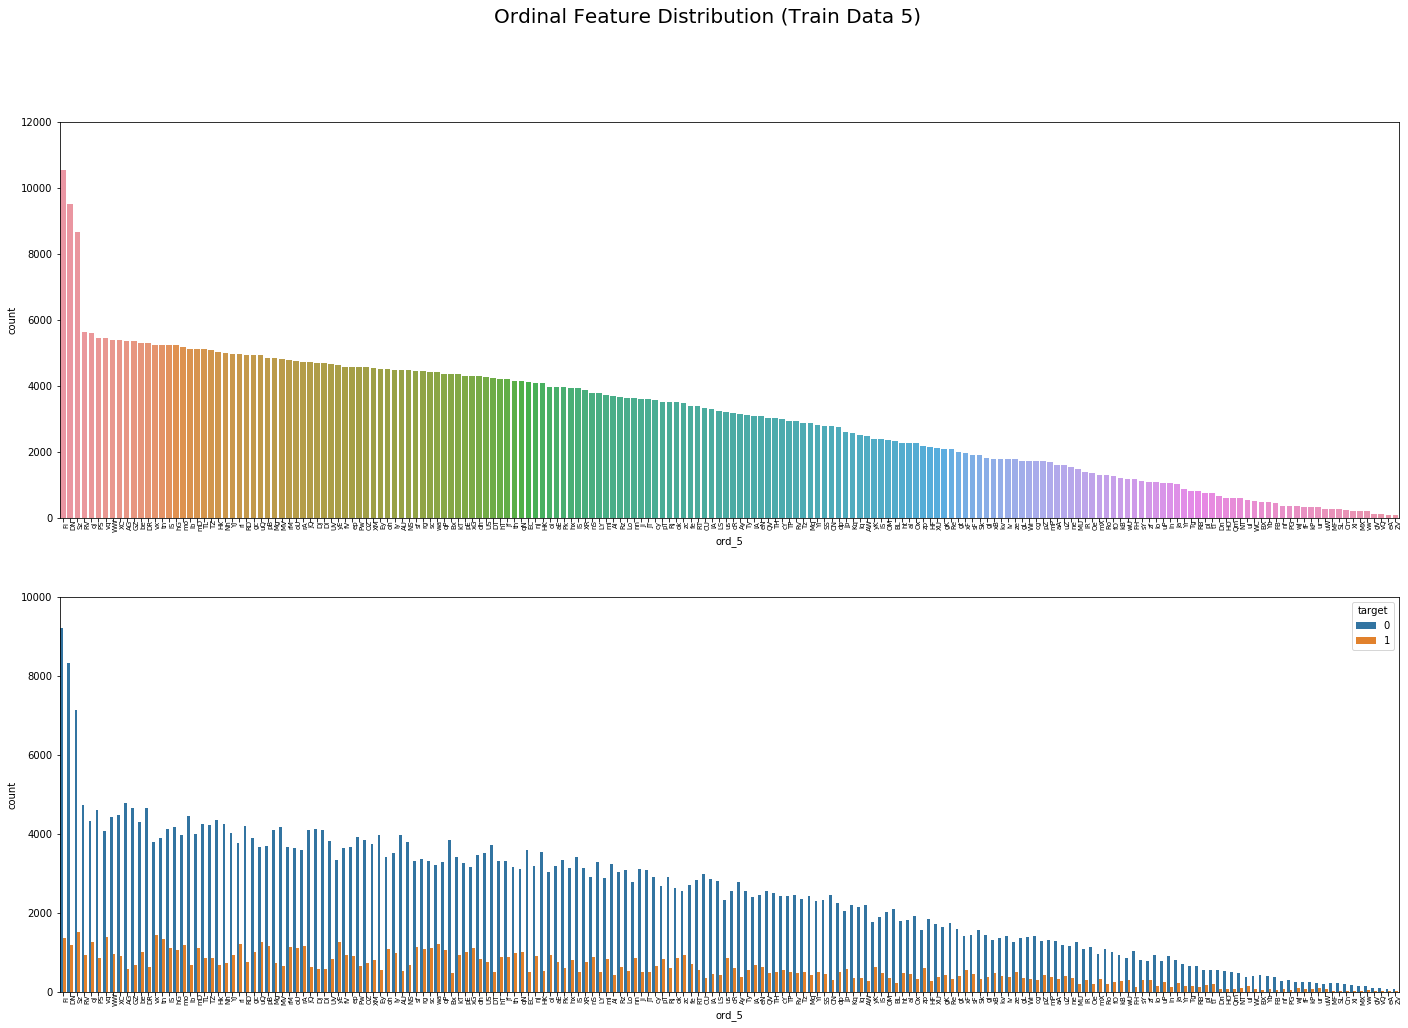

In [5]:
fig, ax = plt.subplots(2,1, figsize=(24, 16))

xlabels = train['ord_5'].dropna().value_counts().index

print(len(xlabels))

# just counting
sns.countplot('ord_5', data= train, ax=ax[0], order = xlabels )
ax[0].set_ylim([0, 12000])
ax[0].set_xticklabels(xlabels, rotation=90, rotation_mode="anchor", fontsize=7)

# with hue
sns.countplot('ord_5', hue='target', data= train, ax=ax[1], order = xlabels )
ax[1].set_ylim([0, 10000])
ax[1].set_xticklabels(xlabels, rotation=90, rotation_mode="anchor", fontsize=7)

fig.suptitle("Ordinal Feature Distribution (Train Data 5)", fontsize=20)
plt.show()


In [6]:
for i in range(5):
    data = train[[f'ord_{i}', 'target']].groupby(f'ord_{i}')['target'].value_counts().unstack()
    data['rate'] = data[1] / (data[0] + data[1])
    data.sort_values(by=['rate'], inplace=True)
    display(data.style.highlight_max(color='green').highlight_min(color='#cd4f39'))


target,0,1,rate
ord_0,,,
1.0,195539,32378,0.142060
2.0,126900,29097,0.186523
3.0,150371,47427,0.239775


target,0,1,rate
ord_1,,,
Novice,135540,25057,0.156024
Contributor,90825,18996,0.172972
Expert,113178,26499,0.189716
Master,59913,16085,0.211650
Grandmaster,73561,22305,0.232669


target,0,1,rate
ord_2,,,
Freezing,123850,18876,0.132253
Cold,82933,14889,0.152205
Warm,102447,21792,0.175404
Hot,53657,13851,0.205176
Boiling Hot,64101,20689,0.244003
Lava Hot,45987,18853,0.290762


target,0,1,rate
ord_3,,,
a,59344,5977,0.091502
b,40186,4609,0.102891
c,50241,6434,0.113524
d,26833,3801,0.124078
e,33632,5272,0.135513
f,25002,4448,0.151036
g,5118,1062,0.171845
h,45594,10150,0.182082
i,27947,6816,0.196071


target,0,1,rate
ord_4,,,
B,21787,3425,0.135848
A,31625,5008,0.136707
C,27649,4463,0.138982
D,14774,2510,0.145221
E,18586,3285,0.150199
F,14102,2619,0.156629
G,2855,549,0.161281
H,26125,5064,0.162365
I,16528,3277,0.165463


In [7]:
label_order_ord_1 = {
    'Novice': 0,
    'Contributor': 1,
    'Expert': 2,
    'Master': 3,
    'Grandmaster': 4,
}

label_order_ord_2 = {
    'Freezing': 0,
    'Cold': 1,
    'Warm': 2, 
    'Hot': 3,
    'Boiling Hot': 4,
    'Lava Hot': 5,
}

train['ord_1'].replace(label_order_ord_1, inplace=True)
train['ord_2'].replace(label_order_ord_2, inplace=True)
test['ord_1'].replace(label_order_ord_1, inplace=True)
test['ord_2'].replace(label_order_ord_2, inplace=True)

In [8]:
import category_encoders as ce
for i in range(3, 5):
    ce_ordinal_encoder = ce.OrdinalEncoder()
    
    train_temp = train[f'ord_{i}'].sort_values()
    train_temp = ce_ordinal_encoder.fit_transform(train_temp)
    train_temp.sort_index(inplace=True)
    train[f'ord_{i}'] = train_temp
    
    test_temp = test[f'ord_{i}'].sort_values()
    test_temp = ce_ordinal_encoder.transform(test_temp)
    test_temp.sort_index(inplace=True)
    test[f'ord_{i}'] = test_temp

In [9]:
pass

In [11]:
train[[f'ord_{i}' for i in range(6)]].to_csv(f'{DATA_FOLDER_PATH}/train_ord.csv')
test[[f'ord_{i}' for i in range(6)]].to_csv(f'{DATA_FOLDER_PATH}/test_ord.csv')

In [ ]:
## train and test have same unique values  

for i in range(6):
    print(len(train[f'ord_{i}'].unique()))

for i in range(6):
    print(len(test[f'ord_{i}'].unique()))
